## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical process in data analysis that involves summarizing, visualizing, and interpreting data to uncover patterns, anomalies, trends, and relationships. It serves as the first step in data analysis to understand the underlying structure and characteristics of the data before applying any modeling techniques.

**Goals of EDA:**

**1. Understand the data:** Gain insights into the dataset's structure, variables, and relationships.

**2. Detect Anomalies:**  Identify outliers or unusual observations that may affect the analysis.

**3. Check Assumptions:** Validate assumptions required for statistical techniques or models

**4. Generate Hypotheses:** Formulate hypotheses about the data that can be tested with more formal methods.

**5. Guide Further Analysis:** Inform the selection of appropriate statistical tools and models for deeper analysis.


In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

In [50]:
fitness = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\ML\Datasets\CardioGoodFitness.csv")

In [51]:
fitness.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


**Usage:** average number of times the customer plans to use the treadmill each week

**Fitness:** self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape

**Income:** annual household income ($)

**Miles:** average number of miles the customer expects to walk/run each week

In [5]:
fitness.shape

(180, 9)

In [18]:
fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [19]:
fitness.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## df.describe()

The describe() function in pandas provides a summary of the central tendency, dispersion, and shape of dataset's distribution, excluding NaN values. When we call this function it will give the following statistical data for each numerical column in the dataframe:

**1. count:** The number of non-null observations.

**2. mean:** The average value of the data.

**3. std:** The standard deviation, which measures the amount of variation or disperision of the data.

**4. min:** The minimum value in the dataset.

**5. 25%:** The 25th percentile also know as first quartile, Q1, which is the value below which 25% of the data fall.

**6. 50%:** The 50th percentile also known as second quartile, Q2, which is the value below which 50% of the data fall i.e the middle value of the data.

**7. 75%:** The 75th percentile also known as third uartile, Q3, which is the value below which 75% of the data fall.

**8. max:** The maximum value of the dataset

**From the above dataset let's consider age column :**

**25%:** 25% of the age value are less than or equal to 24.

**50%:** 50% of the age values are less than or equal to 26.

**75%:** 75% of the age values are less than or equal to 33.

In [16]:
fitness.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [17]:
fitness.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

## Countplot/BarChart

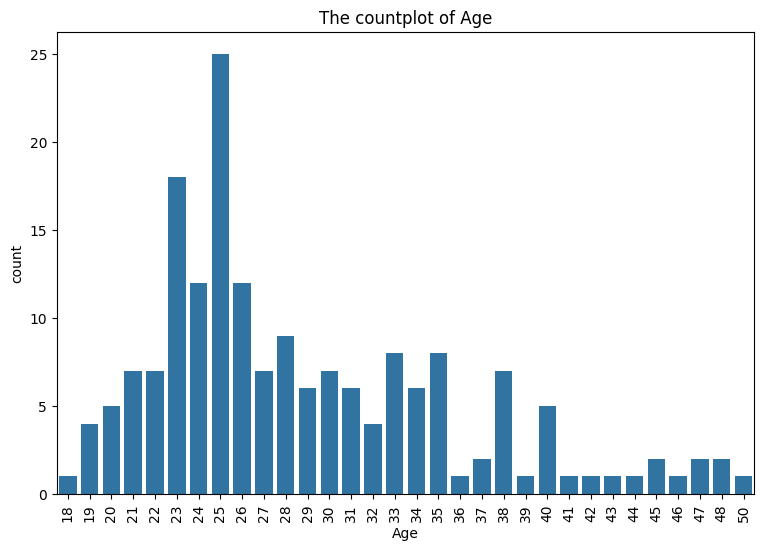

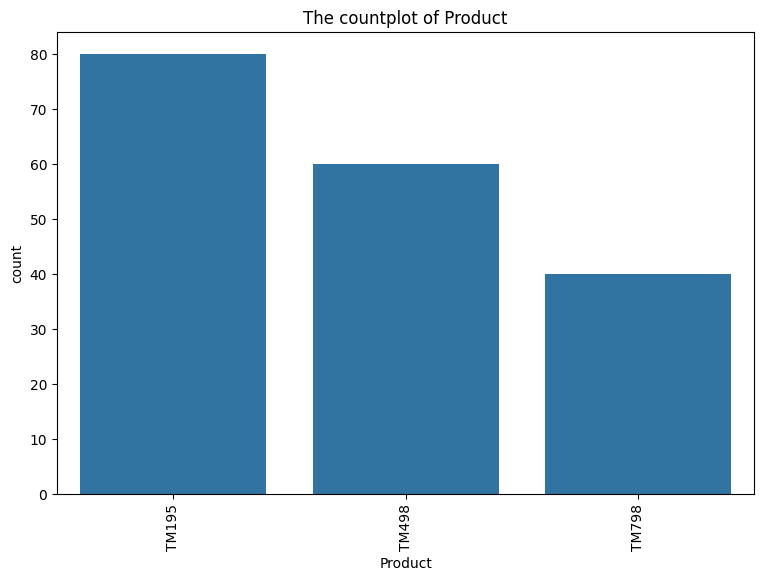

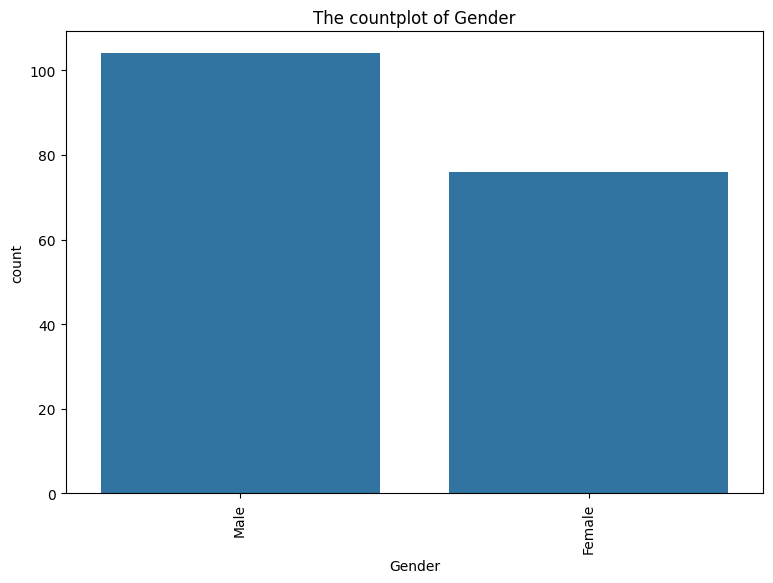

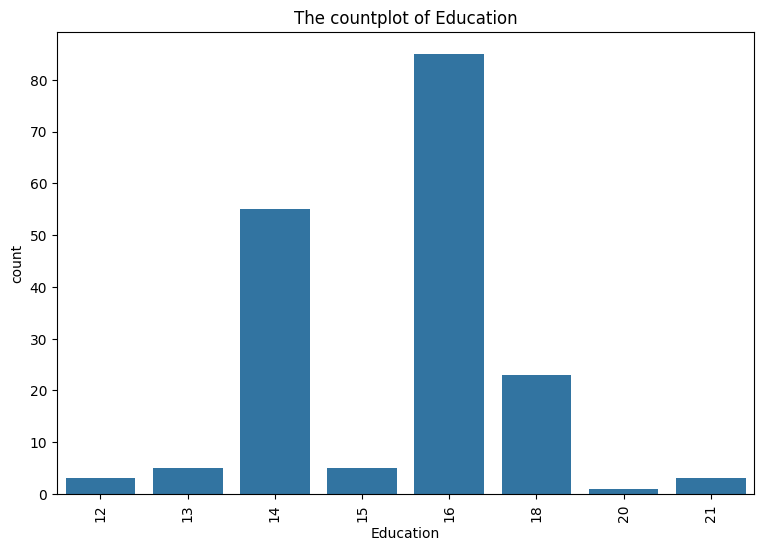

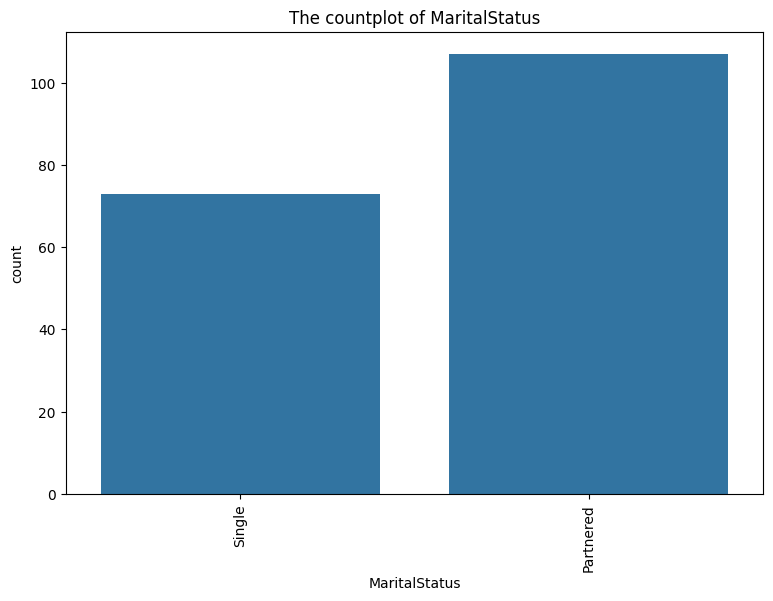

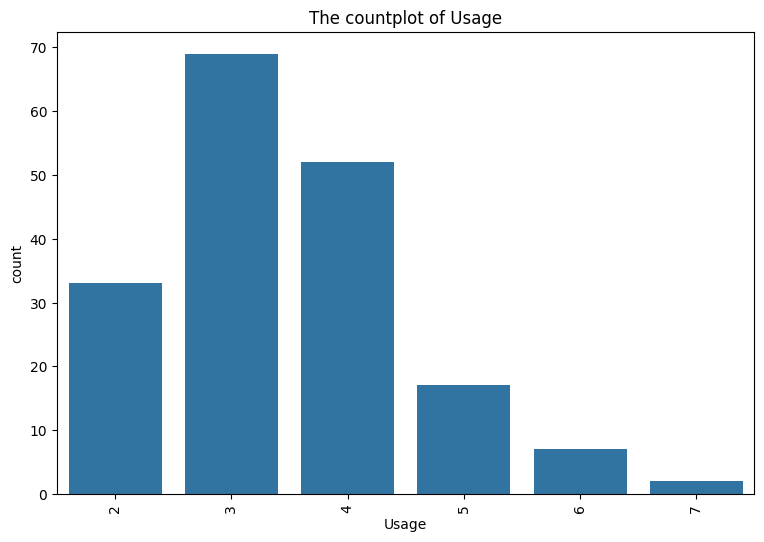

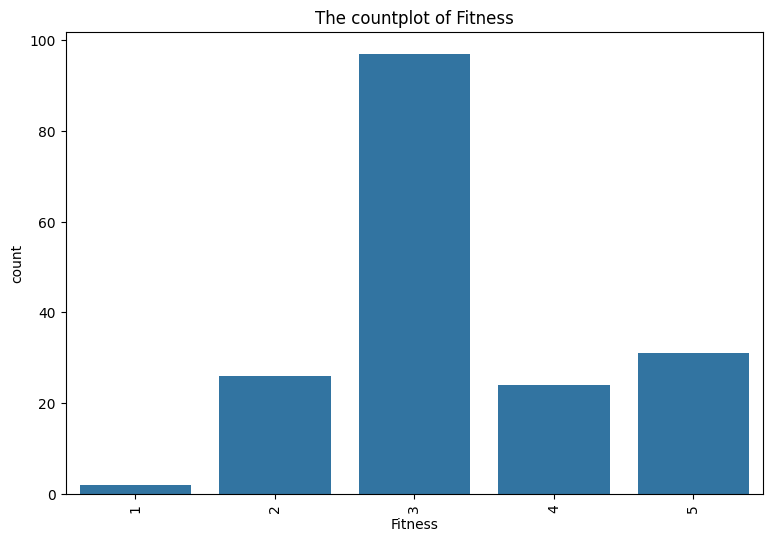

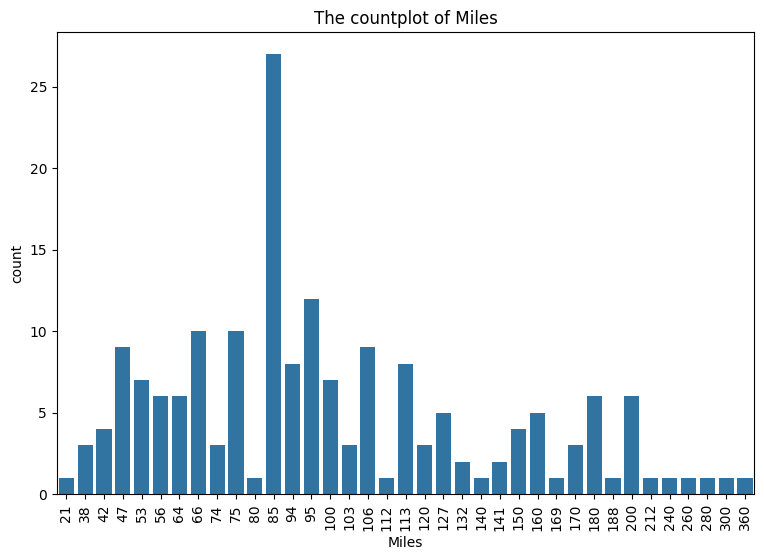

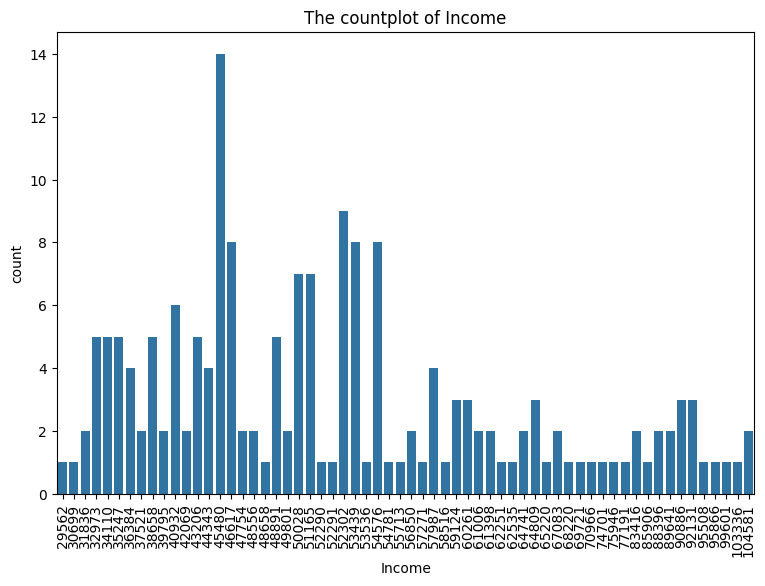

In [25]:
# List of features for which we want to create count plots
features = ['Age','Product', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Miles', 'Income']

# Loop through each feature in the list
for i, feature in enumerate(features):
    # Create a new figure with specified size
    plt.figure(figsize=(9, 6))
    
    # Create a count plot for the current feature
    sns.countplot(x=feature, data=fitness)
    
    # Set the title of the plot
    plt.title(f'The countplot of {feature}')
    
    # Rotate x-axis labels by 90 degrees for better readability
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.show()

## Insights : ##

**1.** TM195 product is purchased more than TM498, TM798.

**2.** Male purchased more when compare to female.

**3.** Most of the customers have 14 or 16 years of education.

**4.** Products are purchased more by married customers when compared to unmarried customers.

**5.** Customers planned to use the threadmill mostly on average 3 times a week.

**6.** Customers Self-rated their fitness mostly 3.

**7.** Most of the customers planned to walk/run 85 miles a week.

**8.** Customers between age 23 to 26 purchased the threadmill more.


## Histogram

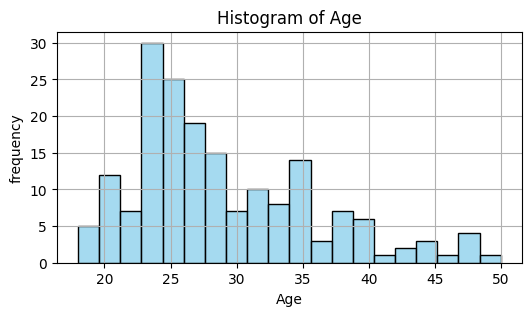

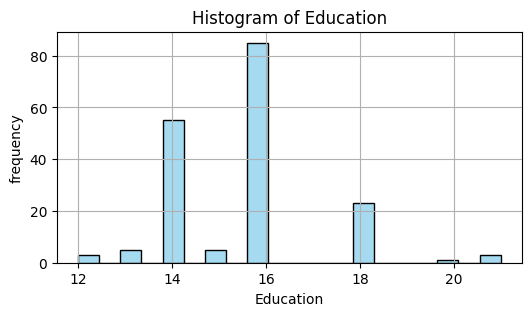

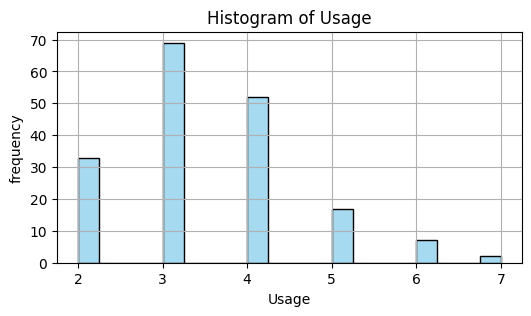

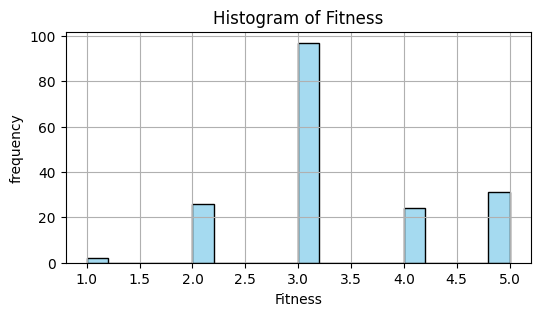

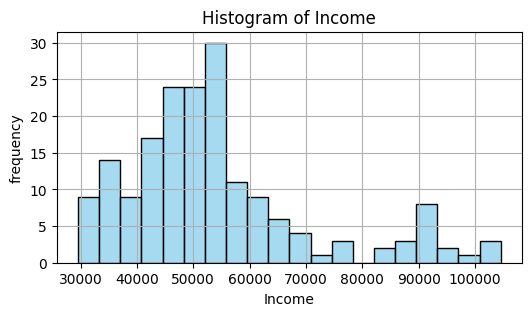

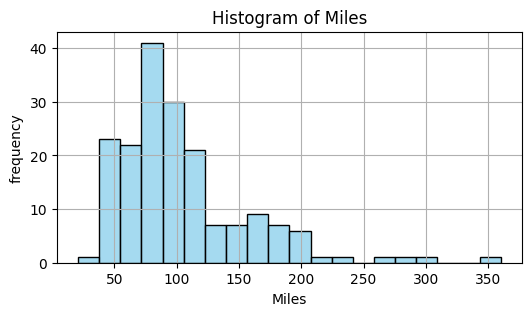

In [21]:
numeric_columns = fitness.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(6,3))
    sns.histplot(fitness[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.grid(True)
    plt.show

We can get the same insights from the histogram as we get in the countplot.

## DensityPlot()

C:\Users\Hp\AppData\Local\Temp\ipykernel_11180\1793657542.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fitness[column], shade=True, color='skyblue')  # Create density plot


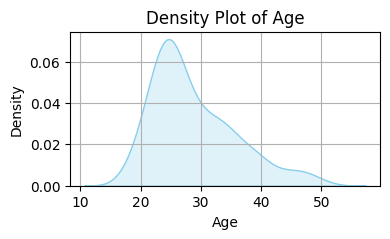

C:\Users\Hp\AppData\Local\Temp\ipykernel_11180\1793657542.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fitness[column], shade=True, color='skyblue')  # Create density plot


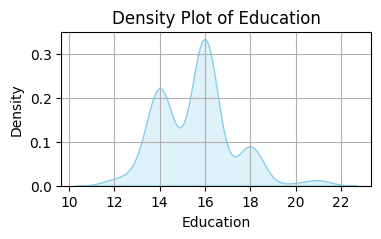

C:\Users\Hp\AppData\Local\Temp\ipykernel_11180\1793657542.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fitness[column], shade=True, color='skyblue')  # Create density plot


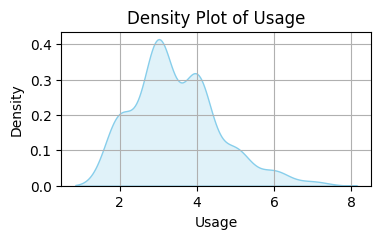

C:\Users\Hp\AppData\Local\Temp\ipykernel_11180\1793657542.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fitness[column], shade=True, color='skyblue')  # Create density plot


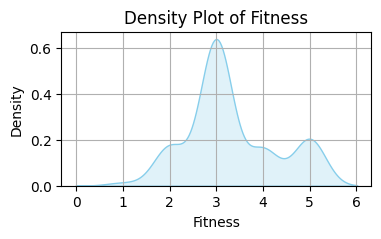

C:\Users\Hp\AppData\Local\Temp\ipykernel_11180\1793657542.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fitness[column], shade=True, color='skyblue')  # Create density plot


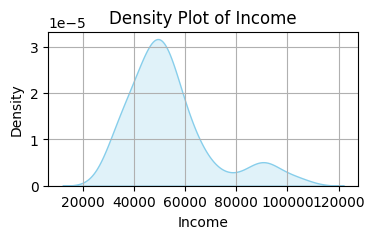

C:\Users\Hp\AppData\Local\Temp\ipykernel_11180\1793657542.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fitness[column], shade=True, color='skyblue')  # Create density plot


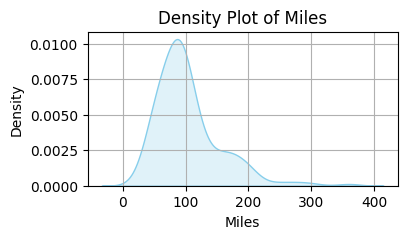

In [27]:
numeric_columns = fitness.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column and create density plots
for column in numeric_columns:
    plt.figure(figsize=(4, 2))  # Set the figure size
    sns.kdeplot(data=fitness[column], shade=True, color='skyblue')  # Create density plot
    plt.title(f'Density Plot of {column}')  # Set the title
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Density')  # Set the y-axis label
    plt.grid(True)  # Show grid
    plt.show()  # Display the density plot

## BoxPlot()

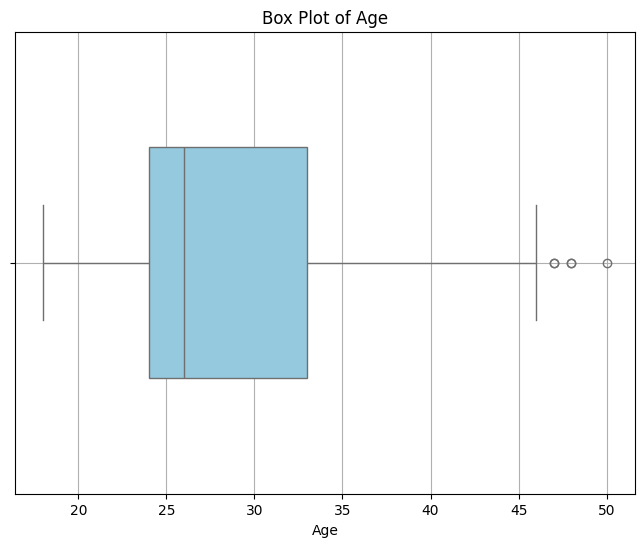

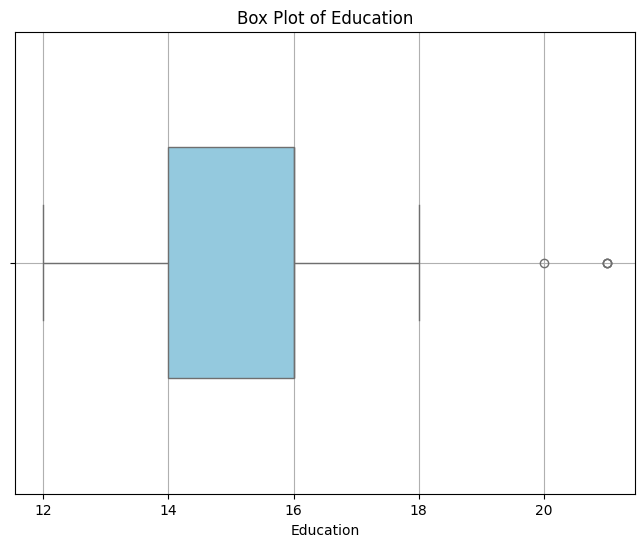

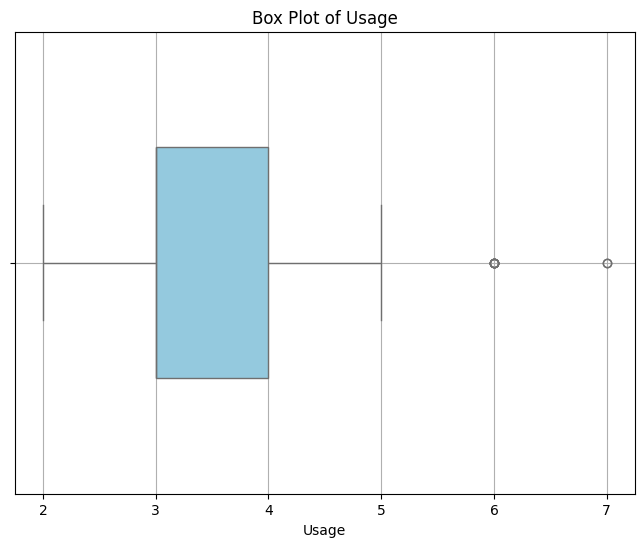

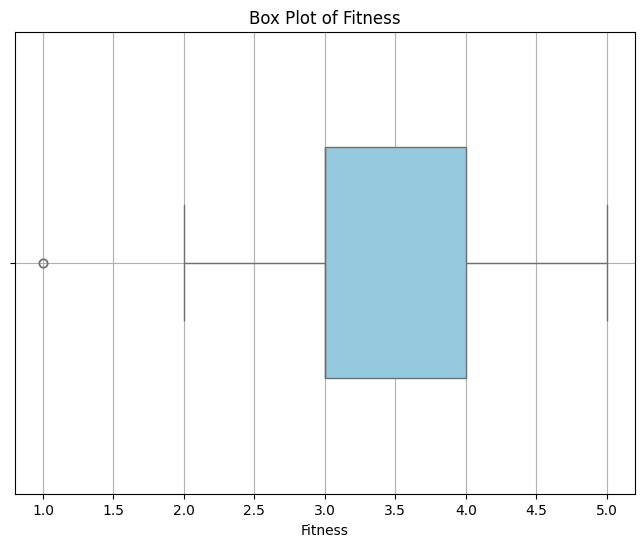

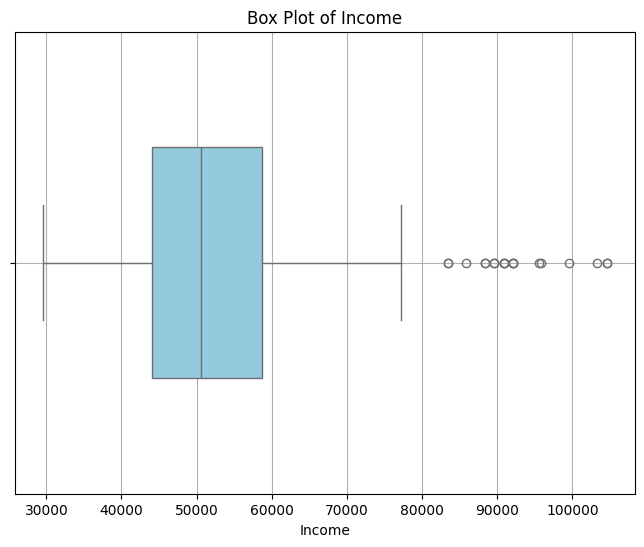

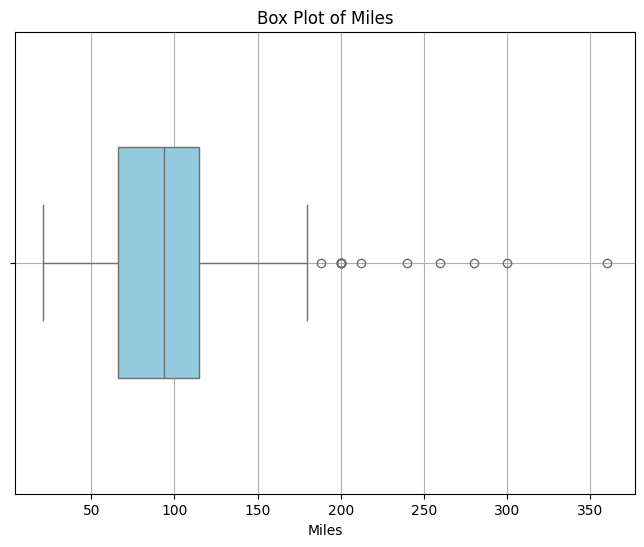

In [28]:
# Assuming 'fitness' is your DataFrame containing the data
numeric_columns = fitness.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column and create box plots
for column in numeric_columns:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.boxplot(x=fitness[column], color='skyblue', width=0.5)  # Create box plot
    plt.title(f'Box Plot of {column}')  # Set the title
    plt.xlabel(column)  # Set the x-axis label
    plt.grid(True)  # Show grid
    plt.show()  # Display the box plot



Box plots provide a visual summary of the distribution of data and key statistical measures. Here's what you can understand from a box plot:

**1. center line :**  The line inside the box represents the median (50th percentile) of the data. It indicates the central tendency or the typical value of the dataset.

**2. Spread:** The length of the box (interquartile range, IQR) represents the spread or variability of the data. The longer the box, the more spread out the data is. The IQR is the range between the 25th and 75th percentiles (Q1 and Q3), covering the middle 50% of the data.

**3. Whiskers:** The whiskers extend from the box and indicate the range of the data outside the IQR. They represent the minimum and maximum values within a certain distance from the box. The length of the whiskers is typically 1.5 times the IQR or extends to the minimum and maximum values if they are within this range.

**4.Outliers:** Individual data points outside the whiskers are considered outliers. They are represented as individual points or dots on the plot. Outliers may indicate unusual or extreme values in the dataset.

**For example take the boxplot of age**

The center line is 50% and the value is 26. The box starting and ending points indicates 25% andd 75& from plot it is 24 and 33. The stating and ending points indicates the min and maximum value of the dataset for age the min value is 18 and max value is 50 but it is at 46 in graph. The circle after 46 represent the outliers.

## Pieplot


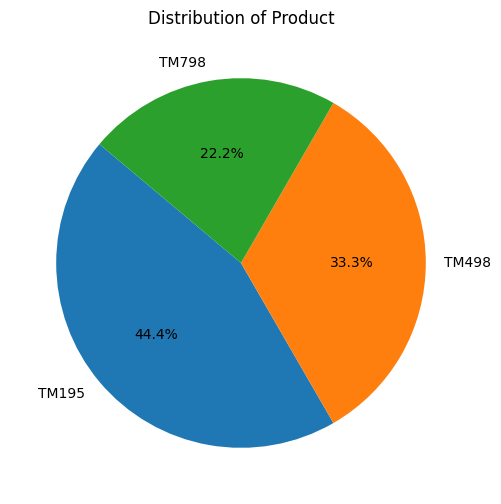

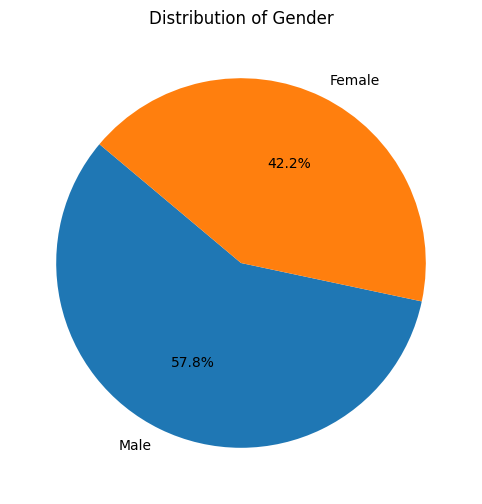

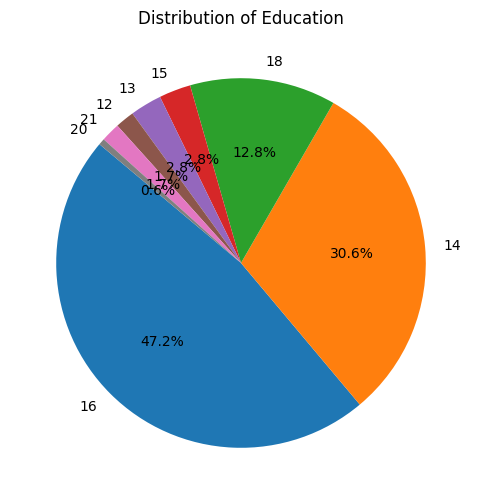

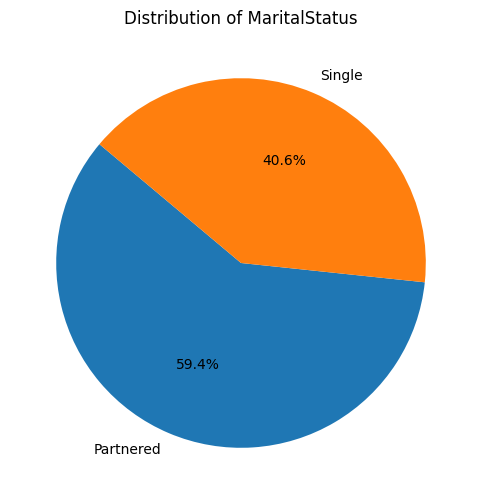

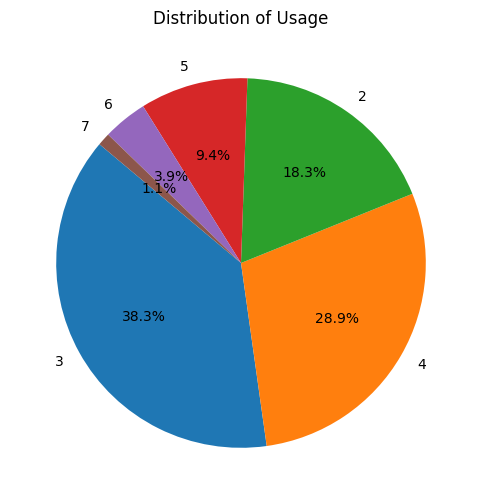

In [34]:
# List of categorical variables
categorical_variables = ['Product', 'Gender', 'Education', 'MaritalStatus', 'Usage']

# Loop through each categorical variable and create a pie chart
for variable in categorical_variables:
    # Calculate the counts of each category in the current variable
    category_counts = fitness[variable].value_counts()
    
    # Extract category labels and counts
    labels = category_counts.index
    counts = category_counts.values
    
    # Create a pie chart
    plt.figure(figsize=(9, 6))  # Set the figure size
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)  # Create pie chart
    plt.title(f'Distribution of {variable}')  # Set the title
    plt.show()  # Display the pie chart

We can get the same insights from the pie chart as we get from countplot and histogram


## zscore

The z-score, also known as standard score or z-value, is a measure of how many standard deviations a data point is from the mean of the dataset. It is calculated by subtracting the mean from the individual data point and then dividing by the standard deviation. The formula for calculating the z-score of a data point x is :

z=(x-μ)/σ

**1.** x is the individual data point

**2.** μ is the mean of the dataset

**3.** σ is the standard deviation of the dataset.

**Identification of Outliers:** Z-scores can be used to identify outliers in a dataset. Data points with z-scores that fall beyond a certain threshold (e.g., z-score > 3 or z-score < -3) are considered outliers and may be worth further investigation.
​


In [37]:
numerical_columns = fitness.select_dtypes(include=['int64', 'float64']).columns
z_scores = fitness[numerical_columns].apply(zscore)
fitness_with_zscores = pd.concat([fitness, z_scores.add_suffix('_zscore')],axis=1)
fitness_with_zscores

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_zscore,Education_zscore,Usage_zscore,Fitness_zscore,Income_zscore,Miles_zscore
0,TM195,18,Male,14,Single,3,4,29562,112,-1.558146,-0.974987,-0.421117,0.720443,-1.467585,0.170257
1,TM195,19,Male,15,Single,2,3,31836,75,-1.413725,-0.354854,-1.345520,-0.325362,-1.329438,-0.545143
2,TM195,19,Female,14,Partnered,4,3,30699,66,-1.413725,-0.974987,0.503286,-0.325362,-1.398512,-0.719159
3,TM195,19,Male,12,Single,3,3,32973,85,-1.413725,-2.215254,-0.421117,-0.325362,-1.260365,-0.351792
4,TM195,20,Male,13,Partnered,4,2,35247,47,-1.269303,-1.595120,0.503286,-1.371166,-1.122218,-1.086527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200,1.619124,3.365945,2.352092,1.766248,1.804073,1.871748
176,TM798,42,Male,18,Single,5,4,89641,200,1.907967,1.505546,1.427689,0.720443,2.182245,1.871748
177,TM798,45,Male,16,Single,5,5,90886,160,2.341231,0.265279,1.427689,1.766248,2.257879,1.098343
178,TM798,47,Male,18,Partnered,4,5,104581,120,2.630073,1.505546,0.503286,1.766248,3.089857,0.324938


In [42]:
outliers = (z_scores > 3) | (z_scores < -3)
# Print the rows containing outliers
print("Rows with outliers:")
print(fitness[outliers.any(axis=1)])

# Alternatively, you can count the number of outliers in each column
print("\nNumber of outliers in each column:")
outliers.sum()

Rows with outliers:
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
79    TM195   50  Female         16     Partnered      3        3   64809   
157   TM798   26  Female         21        Single      4        3   69721   
161   TM798   27    Male         21     Partnered      4        4   90886   
163   TM798   28    Male         18     Partnered      7        5   77191   
166   TM798   29    Male         14     Partnered      7        5   85906   
167   TM798   30  Female         16     Partnered      6        5   90886   
168   TM798   30    Male         18     Partnered      5        4  103336   
170   TM798   31    Male         16     Partnered      6        5   89641   
173   TM798   35    Male         16     Partnered      4        5   92131   
174   TM798   38    Male         18     Partnered      5        5  104581   
175   TM798   40    Male         21        Single      6        5   83416   
178   TM798   47    Male         18     Partnered      4

Age          1
Education    3
Usage        2
Fitness      0
Income       3
Miles        4
dtype: int64

## ScatterPlot


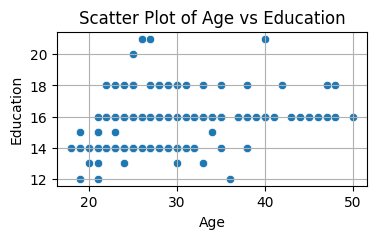

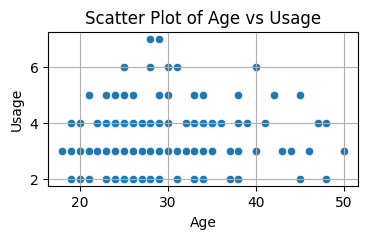

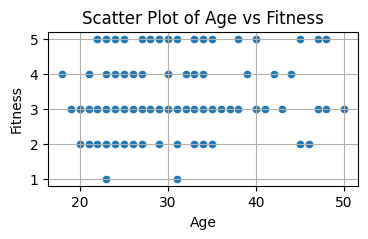

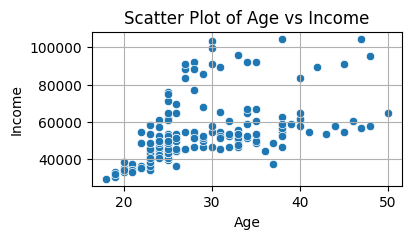

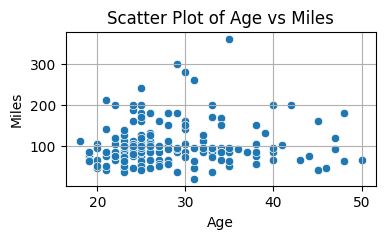

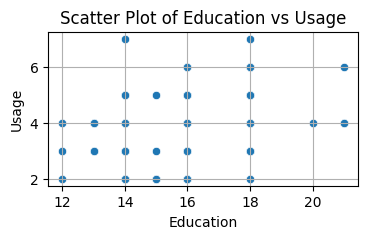

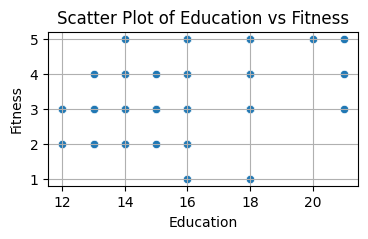

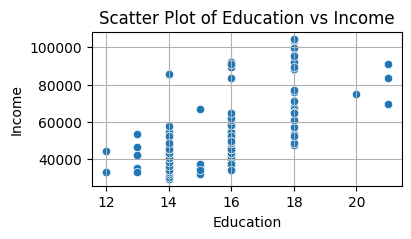

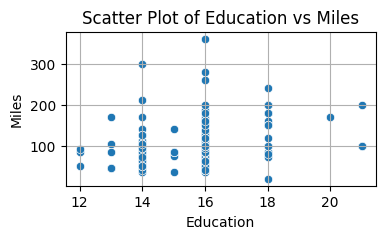

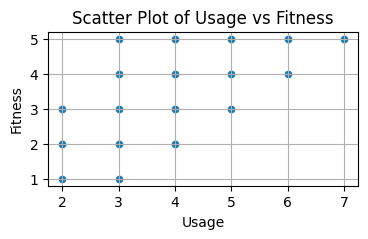

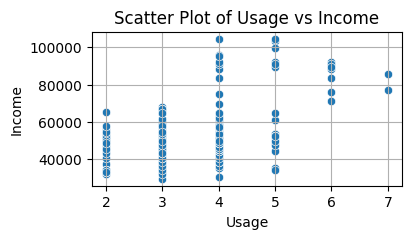

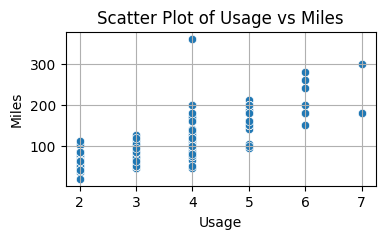

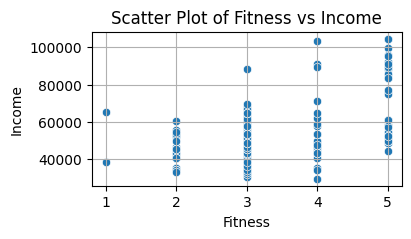

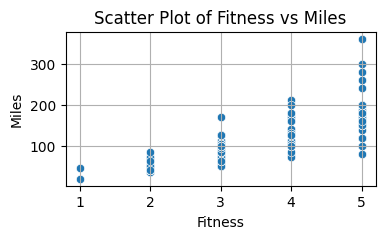

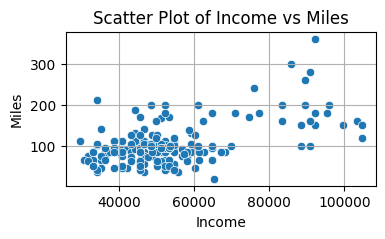

In [52]:
numerical_columns = fitness.select_dtypes(include=['int64', 'float64']).columns

# Create scatter plots for every pair of numerical features
for i, feature1 in enumerate(numerical_columns):
    for feature2 in numerical_columns[i + 1:]:
        plt.figure(figsize=(4, 2))  # Set the figure size
        sns.scatterplot(x=feature1, y=feature2, data=fitness)  # Create scatter plot
        plt.title(f'Scatter Plot of {feature1} vs {feature2}')  # Set the title
        plt.xlabel(feature1)  # Set the x-axis label
        plt.ylabel(feature2)  # Set the y-axis label
        plt.grid(True)  # Show grid
        plt.show()  # Display the scatter plot

## Correlation Analysis

**Correlation Coefficient Interpretation:**

**+1:** Perfect positive correlation, meaning as one variable increases, the other variable also increases in a perfectly linear manner.

**-1:** Perfect negative correlation, meaning as one variable increases, the other variable decreases in a perfectly linear manner.

**0:**  No correlation, meaning there is no linear relationship between the variables.

**0.1 to 0.3(or -0.1 to -0.3):** Weak positive (or negative) correlation.

**0.3 to 0.5 (or -0.3 to -0.5):** Moderate positive (or negative) correlation.

**0.5 to 1.0 (or -0.5 to -1.0):** Strong positive (or negative) correlation.

**Steps to Understand a Correlation Matrix:**

**1.Diagonal Elements:** The diagonal elements of the correlation matrix are always 1 because each variable is perfectly correlated with itself.

**2.Symmetry:** The correlation matrix is symmetric, meaning the correlation between Variable A and Variable B is the same as the correlation between Variable B and Variable A.

**3.Analyzing Relationships:** Look at the off-diagonal elements to understand the relationships between different pairs of variables. For instance, if correlation_matrix['A']['B'] = 0.85, it indicates a strong positive correlation between A and B.

**4.Positive and Negative Correlations:** Positive values indicate a direct relationship, where an increase in one variable leads to an increase in the other.Negative values indicate an inverse relationship, where an increase in one variable leads to a decrease in the other.

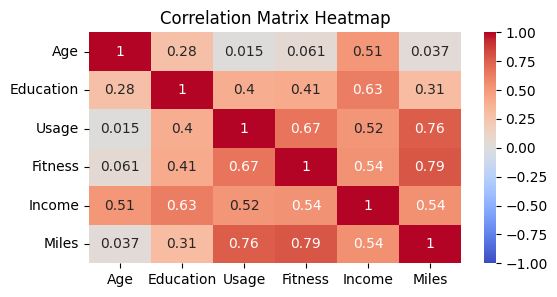

In [54]:
# Select numerical columns
numerical_columns = fitness.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

**From the above correlation matrix heatmap :**

**1.** Age and income are in moderate positive relationship.

**2.** Education and income are in strong positive relationship.

**3.** Usage and Miles are in strong positive relationship.

**4.** Fitness and miles are in strong positive relationship.

**5.** Income and Eduction are in stromg relationship.

**6.** Miles and Fitness are in strong positive relationship.

**7.** Age and Fitness are in weak neagative relationship.

**8.** Positive relaionship means if one variable_1 increases then then the other varialble_2 also increase i.e variable_1 is directly proportional to variable_2.

## Stacked Bar Chart

A stacked bar chart is a type of bar chart used to represent data with multiple categories. Each bar in the chart represents a total value, and segments within each bar represent the breakdown of sub-categories contributing to that total.

**Interpreting the Output:**

**1.Reading the Bar Heights:** The total height of each bar represents the total number of occurrences for that category in feature1.
For example, if you have a bar for 'Product A', the height of the bar indicates the total count of 'Product A' in the dataset.

**2.Reading the Segments:** Each segment within the bar represents the count of the sub-category from feature2.
For example, within the bar for 'Product A', there may be two segments: one for 'Male' and one for 'Female', each representing their respective counts.

**3.Comparing Categories:** By comparing the total heights of the bars, you can see which category in feature1 is the most common.
By comparing the segments within each bar, you can see the distribution of feature2 within each feature1 category.
For example, if 'Product A' has more blue segments than 'Product B', it indicates more occurrences of that sub-category (e.g., 'Male') for 'Product A'.

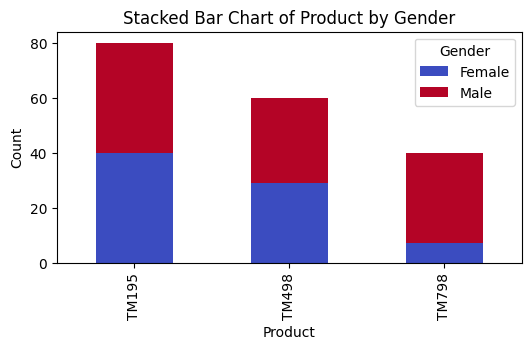

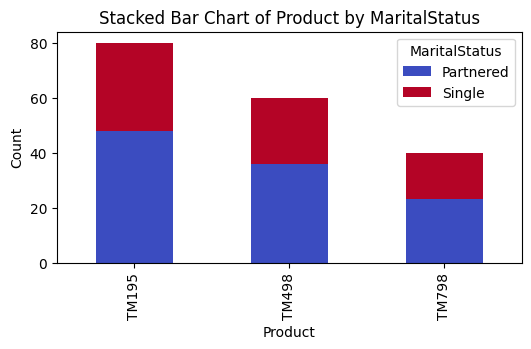

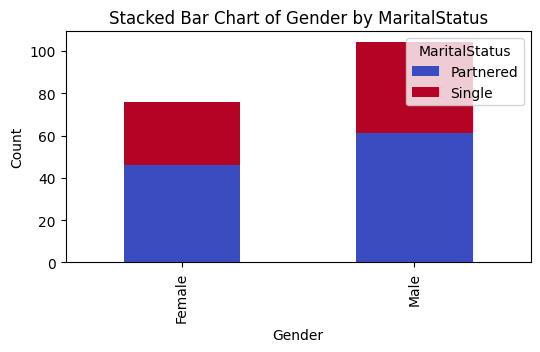

In [59]:
# Select categorical columns
categorical_columns = fitness.select_dtypes(include=['object']).columns

# Create stacked bar charts for every pair of categorical features
for i, feature1 in enumerate(categorical_columns):
    for feature2 in categorical_columns[i + 1:]:
        plt.figure(figsize=(6, 3))  # Set the figure size
        group_data = fitness.groupby([feature1, feature2]).size().unstack()
        group_data.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())
        plt.title(f'Stacked Bar Chart of {feature1} by {feature2}')  # Set the title
        plt.xlabel(feature1)  # Set the x-axis label
        plt.ylabel('Count')  # Set the y-axis label
        plt.legend(title=feature2)
        plt.show()  # Display the stacked bar chart

**Let's consider the first stacked bar chart of product by gender:**

**1st bar:** The total length of the bar is the count of the product TM195 i.e how many times TM195 occurs in the datset. The segments represents the count of gender i.e the blue segment represent how many female purchased TM195 and red segement represents how many male purchased TM195. In this case almost female and male purchased the same number of TM195.

**2nd bar:** Here also the same almost both are equal.

**3rd bar:** Here female purchased less TM798 when compared to male.

## Chi Square Test:

The Chi-Square Test is a statistical method used to determine if there is a significant association between two categorical variables. It compares the observed frequencies of data points in each category to the frequencies expected if there were no association between the variables.

**Chi-Square Test for Independence:**

**Steps to Perform the Test:**

**1.Create a Contingency Table:** A table that displays the frequency distribution of variables.

**2.Calculate Expected Frequencies:** Under the null hypothesis, the expected frequency for each cell in the contingency table is calculated.

**3.Compute the Chi-Square Statistic:**Compare observed frequencies with expected frequencies using the Chi-Square formula:

χ**2 = ∑(((O-E)^2)/E) 

where O is the observed frequency and E  is the expected frequency.

**4.Determine the Degrees of Freedom:** df=(rows−1)×(columns−1)

**5.Find the p-value:** Compare the computed Chi-Square statistic with the Chi-Square distribution to determine the p-value.

**6.Make a Decision:** If the p-value is less than the significance level (e.g., 0.05), reject the null hypothesis, indicating a significant association between the variables.

**7.Null Hypothesis (H0):** There is no association between the type of product purchased and the gender of the customers.

**Interpretation:**

**Chi-Square Statistic:** This value tells you how much the observed frequencies deviate from the expected frequencies.

**P-value:** This value indicates the probability of obtaining the observed distribution if there is no association between the variables. A p-value less than 0.05 typically indicates a significant association.

**Degrees of Freedom:** This is based on the number of categories in each variable.

**Expected Frequencies:** These are the frequencies we would expect if there were no association between the variables.

 

In [67]:
# Select categorical columns
categorical_columns = fitness.select_dtypes(include=['object']).columns

# Create stacked bar charts for every pair of categorical features
for i, feature1 in enumerate(categorical_columns):
    for feature2 in categorical_columns[i + 1:]:
        contingency_table = pd.crosstab(fitness[feature1], fitness[feature2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f'Chi Square Test between {feature1} and {feature2}')
        # Print the results
        print("Chi-Square Statistic:", chi2)
        print("P-value:", p)
        print("Degrees of Freedom:", dof)
        print("Expected Frequencies Table:")
        print(expected)
        print("\n")

Chi Square Test between Product and Gender
Chi-Square Statistic: 12.923836032388664
P-value: 0.0015617972833158714
Degrees of Freedom: 2
Expected Frequencies Table:
[[33.77777778 46.22222222]
 [25.33333333 34.66666667]
 [16.88888889 23.11111111]]


Chi Square Test between Product and MaritalStatus
Chi-Square Statistic: 0.0806554858532839
P-value: 0.9604745988058153
Degrees of Freedom: 2
Expected Frequencies Table:
[[47.55555556 32.44444444]
 [35.66666667 24.33333333]
 [23.77777778 16.22222222]]


Chi Square Test between Gender and MaritalStatus
Chi-Square Statistic: 0.009807875014836896
P-value: 0.9211107060338629
Degrees of Freedom: 1
Expected Frequencies Table:
[[45.17777778 30.82222222]
 [61.82222222 42.17777778]]




From above we can say that 

**1.** There is a significant association between product and gender.

**2.** There is no significant association between product and Marital status.

**3.** There is no significant association between gender and marital status

## LineGraph

Line graphs are commonly used to visualize the trend or change in numerical data over time or other continuous variables.we can plot line graphs to visualize the trends in these features.

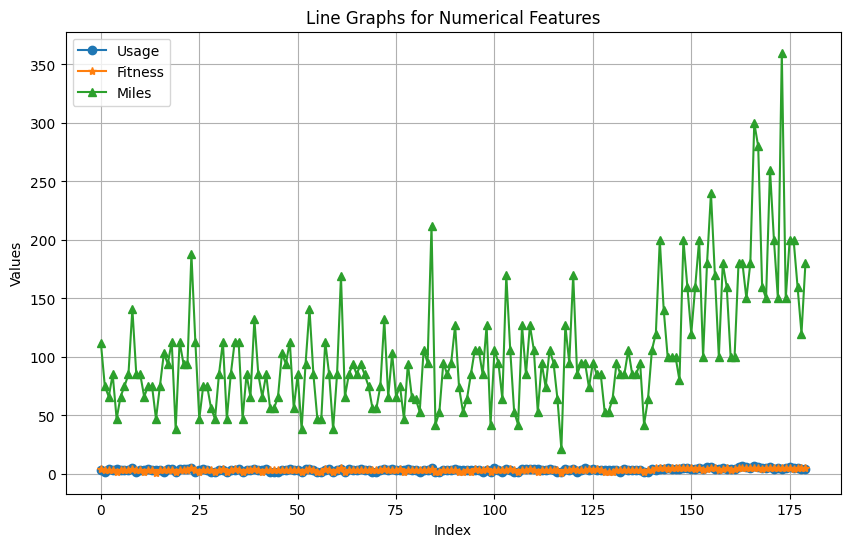

In [69]:
# Create line plots for each numerical feature
plt.figure(figsize=(10, 6))

# Plot for 'Usage'
plt.plot(fitness.index, fitness['Usage'], label='Usage', marker='o')

# Plot for 'Fitness'
plt.plot(fitness.index, fitness['Fitness'], label='Fitness', marker='*')

# Plot for 'Miles'
plt.plot(fitness.index, fitness['Miles'], label='Miles', marker='^')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Graphs for Numerical Features')
plt.legend()
plt.grid(True)
plt.show()

No of Miles increased as the index increased. But there is no trend for usage or fitness.

## ViolinPlot

Violin plots are useful for visualizing the distribution of numerical data and comparing distributions between different groups.Violin plots are a type of data visualization that combines the features of box plots and kernel density plots. They are particularly useful for visualizing the distribution of data and comparing distributions between different groups. Here's how to interpret a violin plot:

**1.Shape:** The shape of the violin plot represents the kernel density estimation (KDE) of the data distribution. It resembles a rotated kernel density plot mirrored along the vertical axis.

**2.Width:** The width of the violin plot at any given point represents the probability density of the data at that value. Wider sections indicate a higher probability density, while narrower sections indicate a lower probability density.

**3.Interquartile Range (IQR):** Inside the violin plot, there may be a white dot or a line indicating the median of the data distribution. The thick black line represents the interquartile range (IQR), which spans from the first quartile (25th percentile) to the third quartile (75th percentile) of the data.

**4.End Points:** The end points of the violin plot extend to the minimum and maximum values of the data, unless there are outliers. If outliers are present, they are typically plotted as individual points beyond the end points of the violin.

**Example Interpretation:**

**Skewedness:** A violin plot with a long tail on one side and a shorter tail on the other side indicates skewness in the data distribution.

**Bimodality:** A violin plot with two distinct peaks suggests that the data may have two separate modes or clusters.

**Outliers:** Outliers are visible as individual points beyond the end points of the violin plot.

**Comparison:** Violin plots can be used to compare the distributions of numerical variables across different groups. Differences in shape, width, or central tendencies between violins indicate differences in the data distributions.

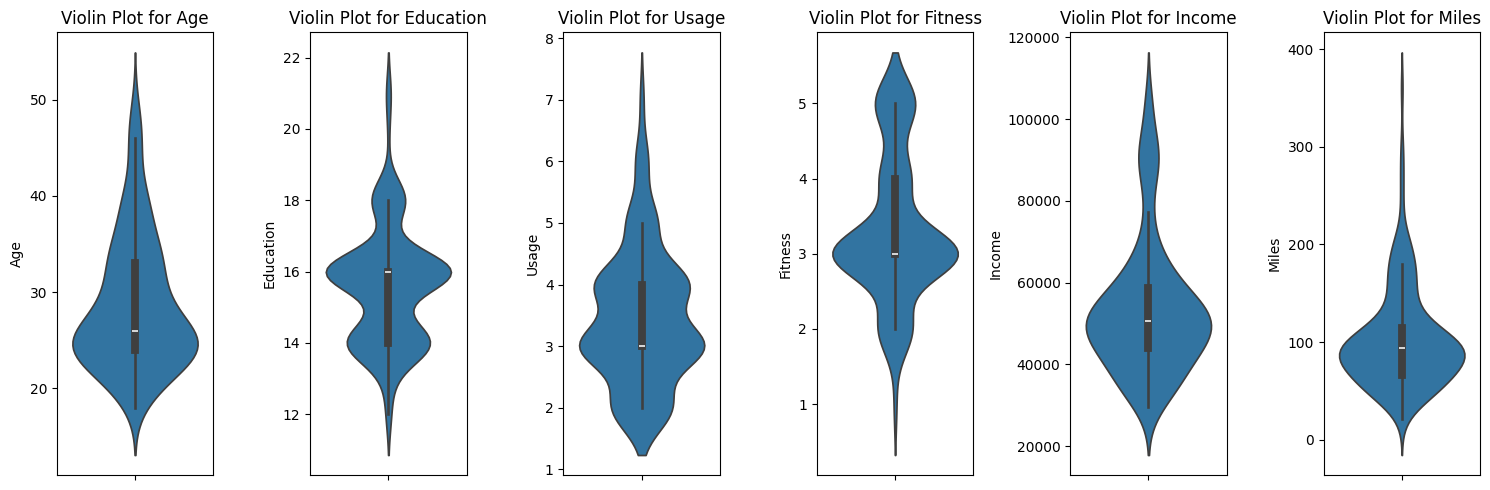

In [70]:
# Select numerical columns
numeric_columns = fitness.select_dtypes(include=['int64', 'float64']).columns

# Create violin plots for each numerical column
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.violinplot(y=fitness[column])
    plt.title(f'Violin Plot for {column}')

plt.tight_layout()
plt.show()

## Pearson's Correlation Coeffiecient


Pearson's correlation coefficient, also known as Pearson's r or simply correlation coefficient, is a statistic that measures the linear relationship between two continuous variables. It quantifies the strength and direction of the association between the variables.

Pearson's correlation coefficient ranges from -1 to 1:

**1.** r=1: Perfect positive linear correlation.

**2.** r=−1: Perfect negative linear correlation.

**3.** r=0: No linear correlation (variables are not linearly related).

**4.** If r is close to 1, there is a strong positive linear relationship between the variables.

**5.** If r is close to -1, there is a strong negative linear relationship between the variables.

**6.** If r is close to 0, there is little to no linear relationship between the variables.

In [75]:
# Select numerical columns
numeric_columns = fitness.select_dtypes(include=['int64', 'float64']).columns

# Calculate Pearson's correlation coefficient for pairs of numerical features
for i, feature1 in enumerate(numeric_columns):
    for feature2 in numeric_columns[i + 1:]:
        corr_coefficient, p_value = pearsonr(fitness[feature1], fitness[feature2])
        print(f"Pearson's correlation coefficient between {feature1} and {feature2}: {corr_coefficient:.2f}")

Pearson's correlation coefficient between Age and Education: 0.28
Pearson's correlation coefficient between Age and Usage: 0.02
Pearson's correlation coefficient between Age and Fitness: 0.06
Pearson's correlation coefficient between Age and Income: 0.51
Pearson's correlation coefficient between Age and Miles: 0.04
Pearson's correlation coefficient between Education and Usage: 0.40
Pearson's correlation coefficient between Education and Fitness: 0.41
Pearson's correlation coefficient between Education and Income: 0.63
Pearson's correlation coefficient between Education and Miles: 0.31
Pearson's correlation coefficient between Usage and Fitness: 0.67
Pearson's correlation coefficient between Usage and Income: 0.52
Pearson's correlation coefficient between Usage and Miles: 0.76
Pearson's correlation coefficient between Fitness and Income: 0.54
Pearson's correlation coefficient between Fitness and Miles: 0.79
Pearson's correlation coefficient between Income and Miles: 0.54
